In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [13]:
df=pd.read_csv('cardio_train.csv',sep=';')


In [14]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
df.shape

(70000, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [17]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X=df.drop(['id','age','cardio'],axis=1)
y=df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=333)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)

In [21]:
dt.score(X_train,y_train)

0.9061607142857143

In [22]:
dt.score(X_test,y_test)

0.6479285714285714

In [76]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [25]:
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [37]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [38]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [39]:
grid_search.best_score_

0.7256071428571429

In [26]:
dt=DecisionTreeClassifier(criterion= 'gini',max_depth= 5,min_samples_leaf= 3,min_samples_split= 3,splitter= 'best')

In [27]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

In [31]:
dt.score(X_test,y_test)

0.7299285714285715

In [34]:
y_pred=dt.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)


0.7299285714285715

[Text(837.0, 498.3, 'X[3] <= 129.5\ngini = 0.5\nsamples = 56000\nvalue = [28004, 27996]'),
 Text(418.5, 407.70000000000005, 'X[5] <= 2.5\ngini = 0.435\nsamples = 33059\nvalue = [22485, 10574]'),
 Text(209.25, 317.1, 'X[3] <= 118.5\ngini = 0.417\nsamples = 30890\nvalue = [21738, 9152]'),
 Text(104.625, 226.5, 'X[2] <= 62.45\ngini = 0.339\nsamples = 9912\nvalue = [7770, 2142]'),
 Text(52.3125, 135.89999999999998, 'X[5] <= 1.5\ngini = 0.26\nsamples = 3361\nvalue = [2844, 517]'),
 Text(26.15625, 45.299999999999955, 'gini = 0.242\nsamples = 2913\nvalue = [2503, 410]'),
 Text(78.46875, 45.299999999999955, 'gini = 0.364\nsamples = 448\nvalue = [341, 107]'),
 Text(156.9375, 135.89999999999998, 'X[4] <= 88.0\ngini = 0.373\nsamples = 6551\nvalue = [4926, 1625]'),
 Text(130.78125, 45.299999999999955, 'gini = 0.362\nsamples = 6276\nvalue = [4787, 1489]'),
 Text(183.09375, 45.299999999999955, 'gini = 0.5\nsamples = 275\nvalue = [139, 136]'),
 Text(313.875, 226.5, 'X[9] <= 0.5\ngini = 0.445\nsamples

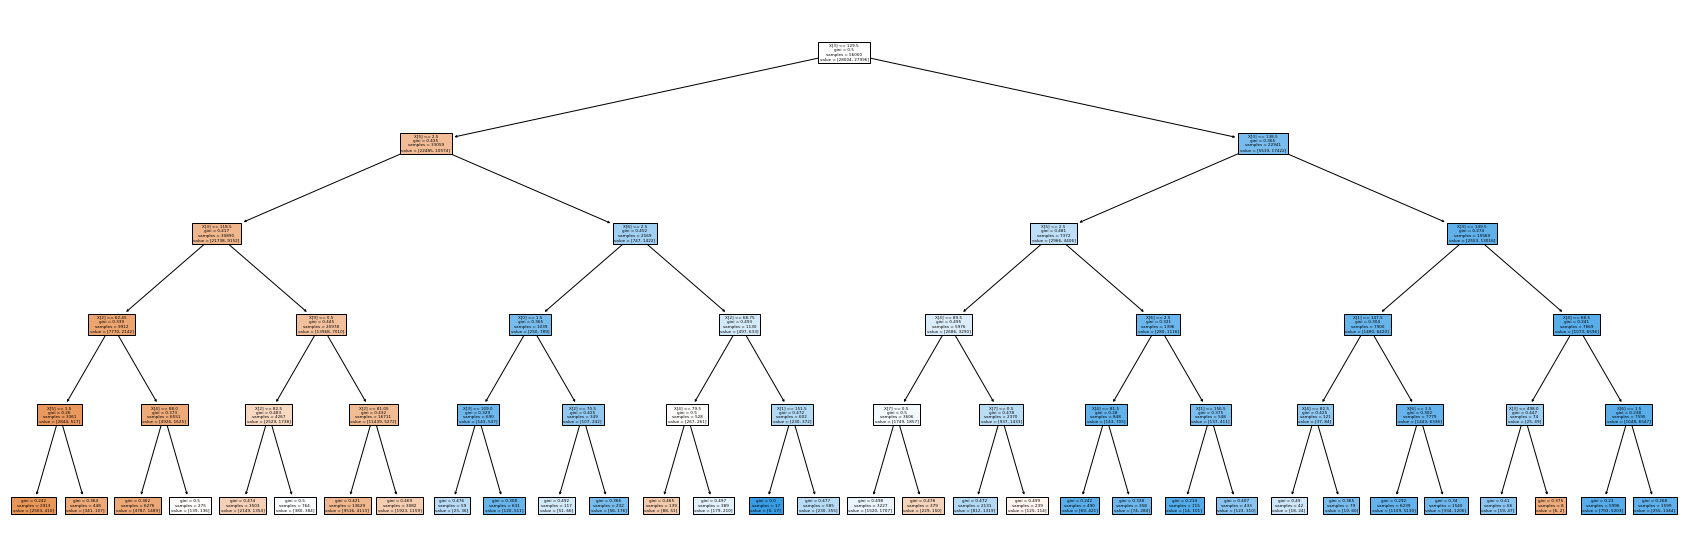

In [47]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt,filled=True)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
rf.score(X_train,y_train)

0.9061607142857143

In [38]:
rf.score(X_test,y_test)

0.6884285714285714

In [70]:
rf=RandomForestClassifier(criterion= 'gini',max_depth= 5,min_samples_leaf= 3,min_samples_split= 3)

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

In [72]:
rf.score(X_test,y_test)

0.7314285714285714

In [73]:
y_pred=rf.predict(X_test)

In [74]:
metrics.accuracy_score(y_test,y_pred)

0.7314285714285714

In [75]:
metrics.confusion_matrix(y_test,y_pred)

array([[5568, 1449],
       [2311, 4672]], dtype=int64)